In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11175.754549,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10776.777318,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10329.931067,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11814.475945,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11473.100973,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [5]:
# categorical data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,Company,TypeName,Cpu_brand,Gpu_brand,Os
0,Apple,Ultrabook,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,Intel Core i5,Intel,Mac
2,HP,Notebook,Intel Core i5,Intel,Others
3,Apple,Ultrabook,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,Intel Core i5,Intel,Mac


In [6]:
len(cat_data['Company'].unique())

19

<AxesSubplot:xlabel='Company', ylabel='count'>

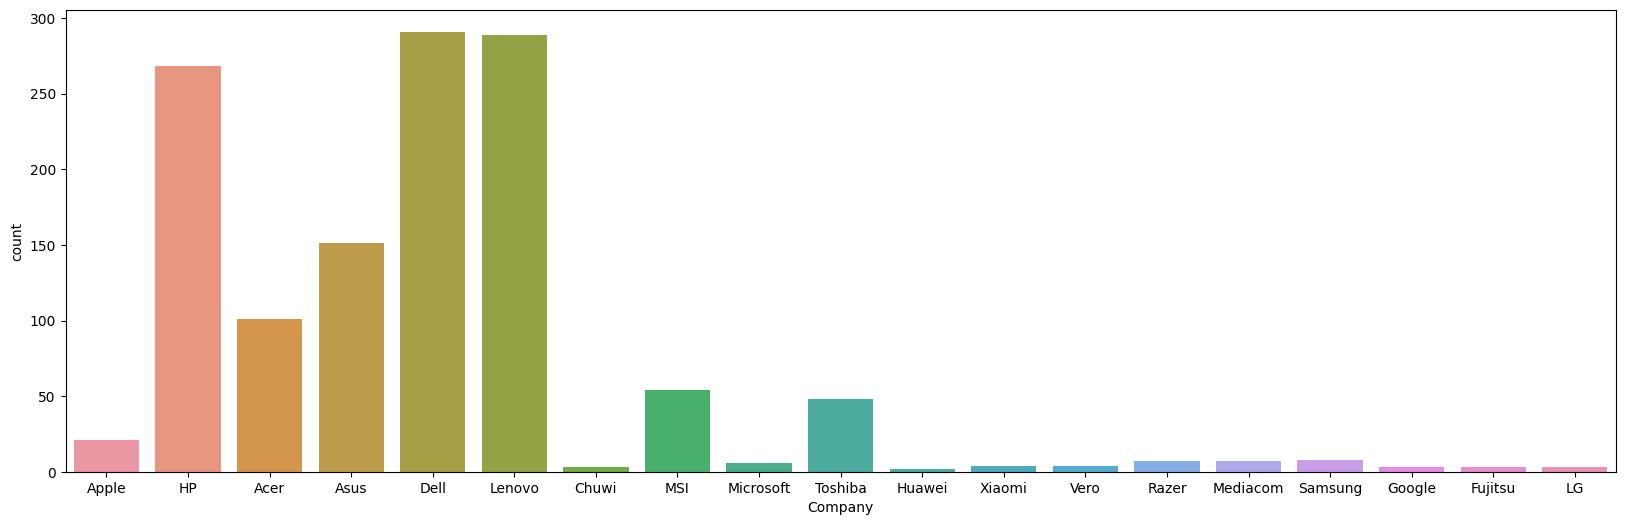

In [7]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Company',data=cat_data,ax=ax)

In [8]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10828.218231,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,619.565022,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9134.616325,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10387.379294,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10872.255358,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11287.447190,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12691.441129,1.000000,1.000000,352.465147,2000.000000,1024.000000


<function matplotlib.pyplot.show(close=None, block=None)>

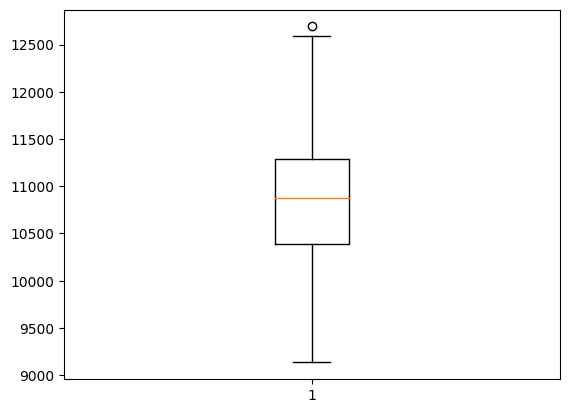

In [9]:
plt.boxplot(df['Price'])
plt.show

Data splitting

In [10]:
X=df.drop(['Price'],axis=1)
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [11]:
X = X.select_dtypes(exclude=['object'])
X

,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,0,1,226.983005,0,128
1,8,1.34,0,0,127.677940,0,0
2,8,1.86,0,0,141.211998,0,256
3,16,1.83,0,1,220.534624,0,512
4,8,1.37,0,1,226.983005,0,256
...,...,...,...,...,...,...,...
1268,4,2.20,0,0,100.454670,500,0
1269,4,1.80,1,1,157.350512,0,128
1270,16,1.30,1,1,276.053530,0,512
1271,2,1.50,0,0,111.935204,0,0


In [24]:
Y=df['Price']
Y

0       11175.754549
1       10776.777318
2       10329.931067
3       11814.475945
4       11473.100973
            ...     
1268    10555.256584
1269    10433.899310
1270    11288.114524
1271     9409.283030
1272    10614.128815
Name: Price, Length: 1273, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

array([11402.13923179, 10446.41255577, 10902.1595102 , ...,
       10462.7658989 , 10703.07797178, 10613.81570422])

Model training

In [15]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr.score(x_train,y_train)

0.601140671229411

In [23]:
pred=lr.predict(x_train)
pred

array([11402.13923179, 10446.41255577, 10902.1595102 , ...,
       10462.7658989 , 10703.07797178, 10613.81570422])

In [19]:
from sklearn.metrics import mean_squared_error as MSE
pred=lr.predict(x_train)
lr_mse=MSE(y_train,pred)
lr_rmse=np.sqrt(lr_mse)
lr_rmse


391.5424525097328